# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

### NAME : Rongchu Zhao.

In [2]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 13:59:51--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 13:59:51 (45.0 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [3]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


First,using 'cvscut' command i could take a look how many columns there are in the dataset, and what the names are. So as we can see the output in previous cell, there are total 27 columns.Basically, this data includes the information about the food inspection information. 

'----' Below is the explaination of each column, given by the document that belongs ITSD Data Management '------'

1:'Facility_Name': Name of the facility where the inspection occurred. In other words it give us the name of the facility that produce the food.

2:'FACILITY_KEY':The unique identifier (number)of the facility where the inspection occurred. Serves as a key in our dataset.

3:'SITE_ADDRESS': The address of the Facility.In other words, the address of the inspection occured.

4:'CITY':City of the facility where the inspection occurred.

5:'STATE': State of the facility where the inspection occurred.

6:'ZIP': The zip code of the facility where the inspeciton occurred.

7:'OWNER_KEY':The unique identifier (number) of the Owner of the facility where the inspection occurred at the time of
the inspection. Serves as a key in our dataset.

8:'OWENR_NAME':Name of the owner of the facility where the inspection occurred at the time of the inspection.

9:'NATURE_OF_BUSINESS':The type of business, originally for internal use only, provides information about the business.

10:'STREET_NUMBER': Street number of the facility where the inspection occurred.

11:'STREET_NAME': Street name of the facility where the inspection occurred.

12:'STREET_TYPE': Street type of the facility where the inspection occurred.

13:'POST_DIRECTIONAL': Postal direction of the facility where the inspection occurred.

14:'PHONE': Phone number of the facility where the inspection occurred.

15:'PROGRAM_CATEGORY': Identify that indicates the type of facility permit the inspection was performed.

16:'PROGRAM_CATEGORY_DESCRIPTION': Descript of the identification that indicates the type of facility.

17:'INSPECTION_DATE': When the inspection taken place.

18:'INSPECTION_TYPE': Code for type of inspection .

19:'INSPECTION_DESC': Description of the inspection.

20:'SERIAL_NUM': Unique ID for the inspection daily activity. This is a sequential number assigned chronologically as the data is entered into the system. 

21:'ACTION_CODE': Code of the action taken. 

22:'ACTION_DESC': Description of the action taken.

23:'RESULT_CODE': Code of the result of the inspection.

24:'RESULT_DESC': Description of the result of the inspection. Usually each result_code has unique result description.

25:'VIOLATION_CODE': The code for the violation.

26:'VIOLATION_DESC': Description of the violation that was found.

27:'INSPECTION_MEMO': Notes from the inspection made by the inspector.

In [4]:
!csvstat abq-food-inspections-fy2010.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

Using 'csvstat' we can take a deeper look about our data. First, there is a null value in column SITE_ADDRESS, NATURE_OF_BUSINESS, STREET_NUMBER, STREET_NAME, STREET_TYPE, POST_DIRECTIONAL, PHONE, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_TYPE, VIOLATION_CODE, VIOLATION_DESC, and INSPECTION_MEMO. Furthermore, the column INSPECTION_MEMO is totally blank, which we can remove it in later steps. 

By exam the result, i found this dataset is actually record the inspection only been taken place in city Albuquerque, which is so true. So, it reminds me to remove the 'CITY, STATE,ZIP' in later step. 

Secondly, i found that on 2009-12-16 there were total 184 inspections have been carried out, followed by 2009-09-10 159 times.

Third,i found the downgrade as a result of inspection result happened 214 times.

Based on what i found i think i will include 3 questions in later part:

1. Which year had the most inspections? And confirm one of my assumption of the reason. 
2. Which program had the most bad outcomes(code=06, represents DOWNGRADE)
3. Which program had the most good outcomes(code=05, represents UPGRADE)
4. Which business type had the most violations.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [5]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [7]:
!createdb -U dbuser data4

What i did in several previous cells is try to use PostgreSql adn creat a database called 'data4'. 

In [8]:
%sql postgresql://dbuser@localhost:5432/data4

'Connected: dbuser@data4'

Here i'm connecting to the database 'data4'that i created before.

In [9]:
!echo "facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_des,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo" > fdinspection.csv

Here I'm giving the header for our new dataset called fdinspection.

In [10]:
!tail -n +2 abq-food-inspections-fy2010.csv >> fdinspection.csv

Then, copy all records in 'abq-food-inspections-fy2010.csv' to new dataset 'fdinspection'.

In [11]:
!csvsql --db postgresql://dbuser@localhost:5432/data4 --insert fdinspection.csv

Inserting our new dataset 'inspection' to the database data4.
In the meantime, the command 'csvsql' combining with '--db' will create a datatable and load the data from the csvfile 'fdinspection.csv' that i created before to a datatable. 

In [12]:
%%sql
ALTER TABLE fdinspection
DROP COLUMN city, DROP COLUMN state, DROP COLUMN zip;

Done.


[]

Here i'm dropping the column 'CITY, STATE, ZIP', cause like i stated before, this dataset only includes the records that happened in Albuquerque.

Because the same city

In [13]:
%%sql
ALTER TABLE fdinspection
DROP COLUMN phone;

Done.


[]

In [14]:
%%sql
ALTER TABLE fdinspection
DROP COLUMN inspection_memo;

Done.


[]

In [15]:
%%sql
ALTER TABLE fdinspection
DROP COLUMN inspection_type;

Done.


[]

Till here, i'm finished the work of dropping column. The column that i choose to drop is all the column that irrelavete of my interest issue. 

In [16]:
%%sql
SELECT COUNT(*) FROM fdinspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

In [14]:
%%sql
select column_name
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='fdinspection';

21 rows affected.


column_name
facility_name
facility_key
site_address
owner_key
owner_name
nature_of_business
street_number
street_name
street_type
post_directional


Here i want to make sure that dropping work has been down properly. The information schema will store the data of the table and information about that table. So using information schema i can easily show all the colums. 

In [15]:
%%sql
ALTER TABLE fdinspection
ADD COLUMN year NUMERIC;

Done.


[]

Add one column to my data table called year.

In [16]:
%%sql
UPDATE fdinspection
SET year = EXTRACT(YEAR FROM inspection_date );

17556 rows affected.


[]

Update the table, set year of each record equals the year part in inspection_date column. 

In [17]:
%%sql
SELECT year, COUNT(*) AS times
FROM fdinspection
GROUP BY year;

2 rows affected.


year,times
2010,6925
2009,10631


So, as we can see from the result of the previous query, 2009 had 10631 times inspection, and 2010 only had 6925 times inspection. Difference between two years is almost 2 times. There are may several reasons. My assumption is maybe 2009 has more emergency response inspection, which may has some thing to do with emergency situation of food quality. So, i will use one query to confirm my assumption. 

In [18]:
%%sql
SELECT year,COUNT (*) AS Emergency_response
FROM fdinspection
WHERE inspection_desc = 'EMERGENCY RESPONSE'
GROUP BY year;

2 rows affected.


year,emergency_response
2009,1889
2010,98


So, as we can see, 2009 had 1889 times emergency response, which almost 10 times more than 2010. So, my assumption is right, one reason why 2009 had more inspections than 2010 is 2009 had more emergency situation that need inspected.

In [19]:
%%sql
SELECT count(result_code),max(result_code),min(result_code)
FROM fdinspection; 

1 rows affected.


count,max,min
17556,27,00


I'm interested in the result_code. Actually the statistic information about the result_code doesn't help much, cause the code is just used to represent different result, hence doesn't contain mathematic meaning. 

In [20]:
%%sql
SELECT count(result_code) AS times,program_category_des
FROM fdinspection
WHERE result_code = '05'
GROUP BY program_category_des
ORDER BY times DESC;

8 rows affected.


times,program_category_des
112,Food Service Establishment
27,Retail - Prepackage Only
19,Retail - Self Service & Prepackage Foods
16,Retail -Grocery
13,Food Processor
10,Bakery
10,NOT FOR PROFIT KITCHEN PERMIT
7,Retail - Specialty Food Permit


The result_code = '05' represents upgrade, which indicates a good outcome of inspection. So here i'm curious that which program has most good outcomes. So, i'm using the count command to count how many times of the good outcome happened of each program, then grouping the result by program.

The result shows that category 0401 has most times of good outcomes, followed by category 0606 and 0601 and so on.

In [21]:
%%sql
SELECT count(result_code) AS times,program_category_des
FROM fdinspection
WHERE result_code = '06'
GROUP BY program_category_des
ORDER BY times DESC;

9 rows affected.


times,program_category_des
41,Food Service Establishment
7,Retail - Deli
6,Retail -Grocery
5,Retail - Prepackage Only
2,Meat Market
2,NOT FOR PROFIT KITCHEN PERMIT
2,Bakery
2,Food Processor
2,Retail - Specialty Food Permit


Like the previous one, excepting curious about the good results, i'm also curios about the bad results. The result_code = '06' represents downgrade outcome. 

The result shows that category 0406 has the most times of bad outcomes followed by category 0608 and so on. 

In [22]:
%%sql
SELECT count(result_code),program_category_des
FROM fdinspection
WHERE result_code = '14'
GROUP BY program_category_des
ORDER BY count DESC;

4 rows affected.


count,program_category_des
33,Food Service Establishment
6,Mobile Food Unit
4,Retail -Grocery
2,Retail - Deli


The result code = '14' indicates an immediate closure outcome, which i think could be ragard as badoutcome. 

So, the top 3 programs that had most times of bad outcomes during 2009-2010 are Food Service Establishment,Retail - Deli,Retail -Grocery.

The top 3 programs that had most times of good outcomes during 2009-2010 are Food Service Establishment,Retail - Prepackage Only,  Retail - Self Service & Prepackage Foods. 

The top 3 programs that had most times of closure outcomes during 2009-2010 are Food Service Establishment, Mobile Food Unit, Retail -Grocery. 
 
I found that category 0406(Food Service Establishment) not only has most good outcomes of inspection, but bad outcomes. So, i don't think it will lead a meaningful result, cause by looking to the category 0406, i found the total number of this category is big, so it is reasonable to observe more outcomes either good or bad. 
One thing i found interesting is the Mobile Food Unit had 6 times closure outcome, which are second most. Basically, i think the mobile food haven't been as regulated as other program, so it may leads a serious outcome after a inspection. 

In [ ]:
%%sql
SELECT nataure_of_business, station_id
FROM (
    SELECT nataure_of_business, 
    UNION
    SELECT DISTINCT end_station AS station, end_station_id AS station_id FROM rides
    ) AS d
LIMIT 10;

In [71]:
%%sql
SELECT nature_of_business, violation_desc,COUNT(violation_code) AS times
FROM fdinspection
WHERE (violation_desc != 'Additional Comments' AND violation_desc != 'No Violations Found')
AND 
nature_of_business != 'None'
GROUP BY nature_of_business, violation_desc
ORDER BY times DESC;

2151 rows affected.


nature_of_business,violation_desc,times
RESTAURANT,Delivered Informational Brochure,491
RESTAURANT,Non-Food contact surfaces,181
RESTAURANT,"Floors, Walls, Ceilings",162
RESTAURANT,Food unprotected,157
RESTAURANT,Plumbing: Improperly installed/maintained/supplied,146
RESTAURANT,Improper sanitizing,134
RESTAURANT,Food contact surfaces,96
RESTAURANT,Cold Holding,85
GROCERY,Delivered Informational Brochure,69
FOOD SERVICE,Delivered Informational Brochure,66


In this qurey, i want to see which business type had most times violation. So i add the 'where' conditional query to filter the result. Here is what i got, as we can see the Restaurant is the business type that had the most violations. But, it is reasonable, cause restaurant is the most big food factory. So, it did not surprise me. But, it tells me the most frequent type of violation is Non-food contact surfaces. It indicates, most violated restaurant did not pay much attention on the non-food surfaces. 

In [72]:
df = _.DataFrame()

In [81]:
%%sql
SELECT DISTINCT violation_desc,COUNT(violation_code) AS times
FROM fdinspection
WHERE (violation_desc != 'Additional Comments' AND violation_desc != 'No Violations Found')
GROUP BY violation_desc
ORDER BY times DESC;

68 rows affected.


violation_desc,times
Delivered Informational Brochure,1657
Plumbing: Improperly installed/maintained/supplied,492
Non-Food contact surfaces,446
Improper sanitizing,434
Food unprotected,425
"Floors, Walls, Ceilings",406
Food contact surfaces,251
Cold Holding,201
"Thermometers not provided, not accurate/consp",183
Hot Holding,175


In [83]:
df = _.DataFrame()

Get the data from previous cell. 

In [84]:
print(df)

                                       violation_desc  times
0                    Delivered Informational Brochure   1657
1   Plumbing: Improperly installed/maintained/supp...    492
2                           Non-Food contact surfaces    446
3                                 Improper sanitizing    434
4                                    Food unprotected    425
5                             Floors, Walls, Ceilings    406
6                               Food contact surfaces    251
7                                        Cold Holding    201
8       Thermometers not provided, not accurate/consp    183
9                                         Hot Holding    175
10                        Other Operations - Lighting    142
11                            Food improperly labeled    134
12                      Improper use of wiping cloths    124
13                          Smoking, Eating, Drinking    114
14    Warewashing Thermometers/Test Kits not provided    113
15         Food dispensi

Checking the dataframe, looks fine then plot.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


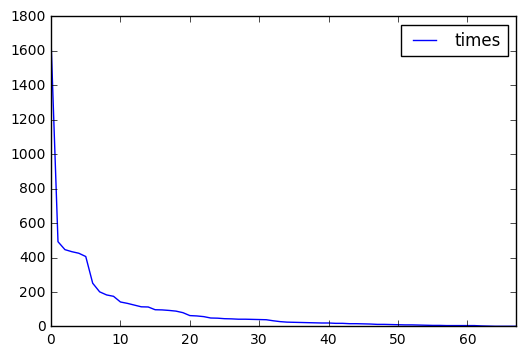

In [86]:
df.plot(kind='line')

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

In [28]:
%%sql
DROP TABLE IF EXISTS facility;
CREATE TABLE facility (
    facility_name CHAR(80),
    facility_key INTEGER, 
    site_address CHAR(90)
);

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO facility (facility_name,facility_key,site_address)
SELECT facility_name, facility_key,site_address
FROM fdinspection;

17556 rows affected.


[]

I think the facitliy_name, facility_key and site_address is redundant in the source data-table, so i will create a new data table called facility to hold these data.

In [36]:
%%sql
DROP TABLE IF EXISTS owner;
CREATE TABLE owner (
    owner_key INTEGER,
    owner_name VARCHAR(100),
    nature_of_business CHAR(30),
    street_number CHAR(50),
    street_type CHAR(10),
    program_code CHAR(50),
    program_code_des CHAR(100)
);

Done.
Done.


[]

In [37]:
%%sql
INSERT INTO owner (owner_key,owner_name,nature_of_business,street_number,street_type,program_code,program_code_des)
SELECT owner_key,owner_name,nature_of_business,street_number,street_type,program_category,program_category_des
FROM fdinspection;

17556 rows affected.


[]

Again, i want to create a nes table to hold the information about the owner.

Here i found something strange, the column like *_code* shoud be integer, but when i insert the data from the source data table, SQL says the data type should be character. So, i think it is my first step, create a datatable directly using 'csvsql' command, result in this outcome. 

In [43]:
%%sql
ALTER TABLE fdinspection
ALTER COLUMN program_category TYPE integer;

(psycopg2.ProgrammingError) column "program_category" cannot be cast automatically to type integer
HINT:  You might need to specify "USING program_category::integer".
 [SQL: 'ALTER TABLE fdinspection\nALTER COLUMN program_category TYPE integer;']


In [ ]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection (
    owner_key INTEGER,
    owner_name VARCHAR(30),
    nature_of_business CHAR(30),
    street_number INTEGER,
    street_type CHAR(10),
    program_code INTEGER,
    program_code_des CHAR(100)
);